In [33]:
import tabula
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [18]:
file = 'Riazi 2005 - Table 4-6.csv'
df = pd.read_csv(file)

In [19]:
df.head()

,Carbon number,M,Tb,SG,7720,dzo,Tc,Pc,de,Zc,Zc .1,व,8
0,6,84,337,0.690,1.395,0.686,510.3,34.4,0.241,0.275,0.255,18.6,7.25
1,7,95,365,0.727,1.407,0.723,542.6,31.6,0.245,0.272,0.303,21.2,7.41
2,8,107,390,0.749,1.417,0.743,570.2,29.3,0.246,0.269,0.346,23.0,7.53
3,9,121,416,0.768,1.426,0.762,599.0,26.9,0.247,0.265,0.394,24.4,7.63
4,10,136,440,0.782,1.435,0.777,623.7,25.0,0.251,0.261,0.444,25.4,7.71


In [113]:
Cs = df['Carbon number '].values
Ms = df['M '].values
sgs = df['SG '].values

In [114]:
def obj_func_correlation_mw_sg_liq(mw, sg_liq):
    """
    source: [2] (eq 3)
    """
    return -sg_liq + 1.07 - np.exp(3.56073 - 2.93886 * mw ** 0.1)

In [115]:
def obj_func_correlation_mw_sg_liq(mw, sg_liq):
    """
    source: [2] (eq 3)
    """
    return -sg_liq + 0.85 - np.exp(92.22793 - 89.82301 * mw ** 0.1)

In [119]:
Ms

array([ 84,  95, 107, 121, 136, 149, 163, 176, 191, 207, 221, 237, 249,
       261, 275, 289, 303, 317, 331, 345, 359, 373, 387, 400, 415, 429,
       443, 457, 471, 485, 499, 513, 528, 542, 556, 570, 584, 599, 614,
       629, 641, 656, 670, 684, 698], dtype=int64)

In [123]:
M = 300
newton(lambda sg_liq: obj_func_correlation_mw_sg_liq(M, sg_liq), x0=0.8)

0.85

In [122]:
M = 107
newton(lambda sg_liq: obj_func_correlation_mw_sg_liq(M, sg_liq), x0=0.8)

0.85

In [116]:
correlated_sg = np.array([newton(lambda sg_liq: obj_func_correlation_mw_sg_liq(M, sg_liq), x0=0.8) for M in Ms])
correlated_mw = np.array([newton(lambda mw: obj_func_correlation_mw_sg_liq(mw, sg_liq), x0=50) for sg_liq in sg])

RuntimeError: Tolerance of 0.005100000000005878 reached. Failed to converge after 1 iterations, value is 50.005100000000006.

In [118]:
correlated_sg

array([0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85,
       0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85,
       0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85,
       0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85,
       0.85])

In [105]:
correlated_mw

array([ 75.43560628,  94.34717634, 108.7570579 , 123.73956285,
       136.65302477, 148.13979287, 161.00779267, 175.4818034 ,
       191.83402536, 208.60767666, 221.59585706, 237.87387779,
       248.91383744, 260.69037331, 273.26961337, 286.72528975,
       301.13981919, 316.60556847, 329.80437501, 340.22377658,
       354.86168231, 370.41622284, 382.73012083, 395.63904378,
       409.18180175, 428.2979626 , 443.48941891, 459.46941631,
       470.58802871, 488.00802721, 500.1437875 , 519.18223492,
       532.46325016, 546.24281641, 560.54627829, 575.40062925,
       583.04330665, 598.77853845, 615.14025364, 632.16234164,
       640.93225351, 659.01364164, 668.33515211, 687.56623534,
       697.48695041])

In [106]:
Ms

array([ 84,  95, 107, 121, 136, 149, 163, 176, 191, 207, 221, 237, 249,
       261, 275, 289, 303, 317, 331, 345, 359, 373, 387, 400, 415, 429,
       443, 457, 471, 485, 499, 513, 528, 542, 556, 570, 584, 599, 614,
       629, 641, 656, 670, 684, 698], dtype=int64)

In [107]:
75.43 / 84

0.8979761904761906

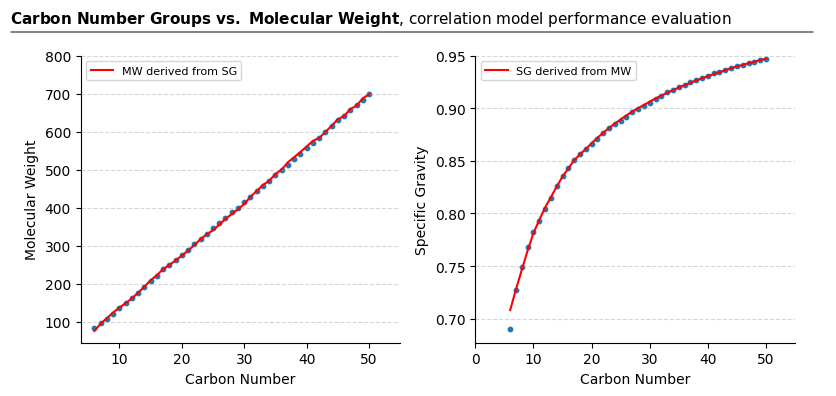

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(Cs, correlated_mw, color='red', label='MW derived from SG')
axes[0].scatter(Cs, Ms, s=10)
axes[0].set_ylabel('Molecular Weight')
axes[0].set_xlim(None, 55)
axes[0].set_ylim(None, 800)

axes[1].plot(Cs, correlated_sg, color='red', label='SG derived from MW')
axes[1].scatter(Cs, sgs, s=10)
axes[1].set_ylabel('Specific Gravity')
axes[1].set_xlim(0, 55)
axes[1].set_ylim(None, 0.95)


for ax in axes:
    ax.set_xlabel('Carbon Number')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(ncol=2, fontsize=8, loc='upper left')
    
def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Carbon Number Groups vs. Molecular Weight')
plain_txt = r', correlation model performance evaluation'
#plain_txt = r', '
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=11)
yloc = 0.9
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))


#ax.minorticks_on()
#ax.grid(axis='y', which='minor', color='grey', linestyle='--', alpha=0.2)

fig.tight_layout()